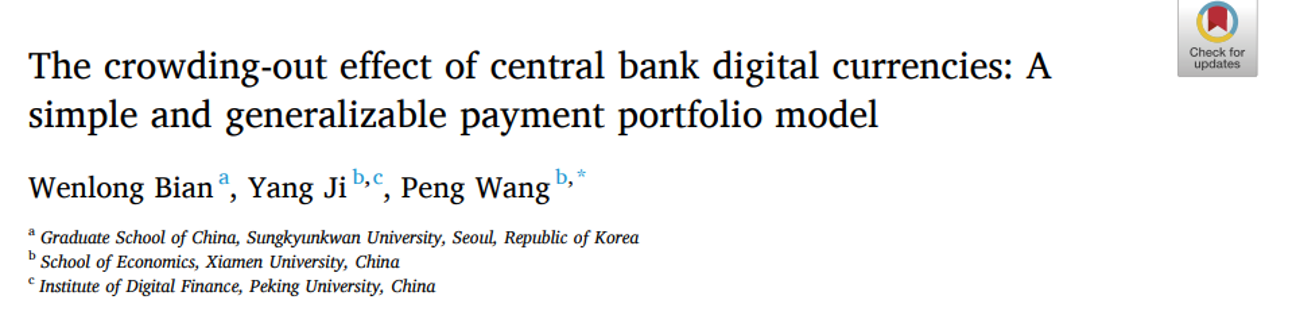

#### Link:  [The crowding-out effect of central bank digital currencies: A simple and generalizable payment portfolio model](https://www.sciencedirect.com/science/article/pii/S154461232100091X?via%3Dihub) (2021)

In [1]:
# Import libraries 
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector
import numpy as np
import random
import seaborn as sns
import pandas as pd

# Define the agent
class EconomicAgent(Agent):
    def __init__(self, unique_id, model, aL, aA, aR, aD):
        super().__init__(unique_id, model)
        self.cash = 0
        self.deposits = 0
        self.cbdc = 0
        self.aL = aL
        self.aA = aA
        self.aR = aR
        self.aD = aD
        self.P = random.uniform(1, 10)  # Payment need

    def step(self):
        # Determine demand for CBDC
        if self.aL * self.aD > self.aR * self.aA:
            self.cbdc = self.P * (self.aA + self.aD) / (self.aL + self.aR)
            self.cash = self.P * (self.aL / (self.aA + 1))
            self.deposits = self.P * (self.aL / (self.aR + 1))
        else:
            self.cbdc = 0
            self.cash = self.P * (self.aL + self.aA)
            self.deposits = self.P * (self.aD + self.aR)
        
        # Debug print statements
        # print(f"Agent {self.unique_id} - Cash: {self.cash:.2f}, Deposits: {self.deposits:.2f}, CBDC: {self.cbdc:.2f}")

In [2]:
# Define the model
class EconomicModel(Model):
    def __init__(self, N, grid_size=10):
        super().__init__()  # Properly initialize the Model class
        self.num_agents = N
        self.grid = MultiGrid(grid_size, grid_size, True)
        self.schedule = RandomActivation(self)

        # Create agents
        for i in range(self.num_agents):
            aL, aA, aR, aD = np.random.dirichlet(np.ones(4), size=1)[0]
            agent = EconomicAgent(i, self, aL, aA, aR, aD)
            self.schedule.add(agent)

            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(agent, (x, y))

        # Data collector
        self.datacollector = DataCollector(
            agent_reporters={
                "Cash": lambda agent: agent.cash,
                "Deposits": lambda agent: agent.deposits,
                "CBDC": lambda agent: agent.cbdc,
            }
        )

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()
        # print(f"Step {self.schedule.steps} completed.")  # Debug print

# Run the model
model = EconomicModel(100)
for _ in range(100):
    model.step()

# Extract data and plot
data = model.datacollector.get_agent_vars_dataframe().reset_index()
data.to_csv("simulation_data.csv", index=False)

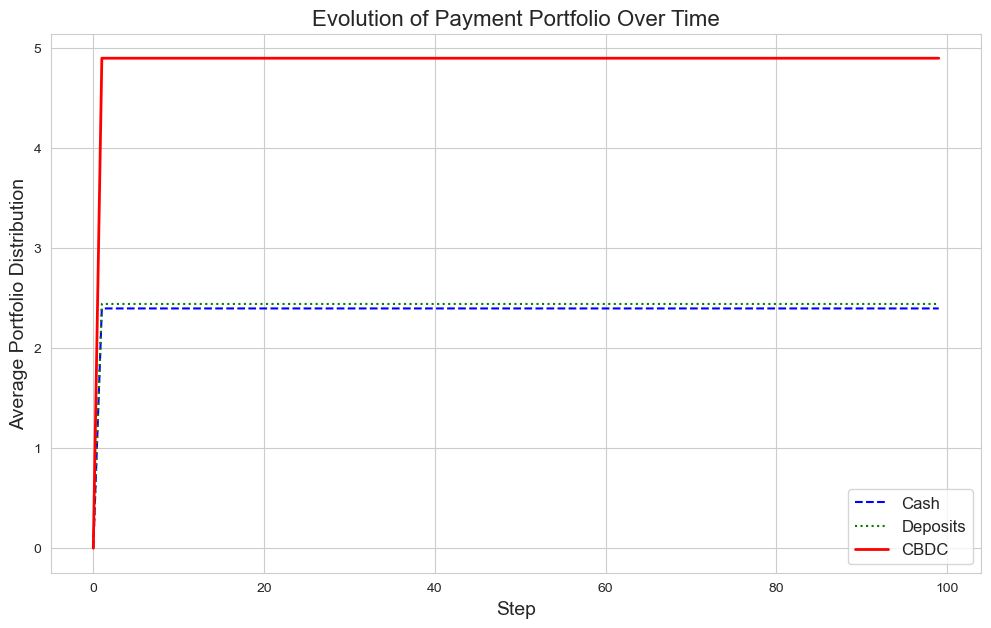

In [3]:
loaded_data = pd.read_csv("simulation_data.csv")
avg_data = loaded_data.groupby("Step").mean()

# Improved visualization using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
sns.lineplot(data=avg_data, x=avg_data.index, y="Cash", label="Cash", linestyle="dashed", color="blue")
sns.lineplot(data=avg_data, x=avg_data.index, y="Deposits", label="Deposits", linestyle="dotted", color="green")
sns.lineplot(data=avg_data, x=avg_data.index, y="CBDC", label="CBDC", linewidth=2, color="red")
plt.xlabel("Step", fontsize=14)
plt.ylabel("Average Portfolio Distribution", fontsize=14)
plt.title("Evolution of Payment Portfolio Over Time", fontsize=16)
plt.legend(fontsize=12)
plt.show()

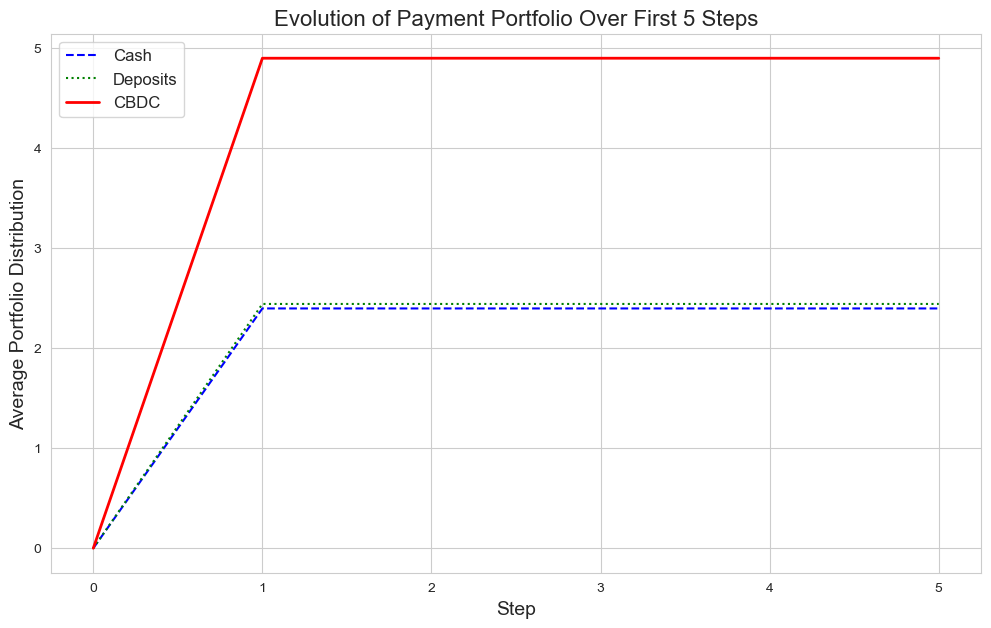

In [4]:
# Filter data for only the first 5 steps
filtered_data = loaded_data[loaded_data["Step"] <= 5]

# Compute average values per step
avg_data = filtered_data.groupby("Step").mean()

# Improved visualization using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
sns.lineplot(data=avg_data, x=avg_data.index, y="Cash", label="Cash", linestyle="dashed", color="blue")
sns.lineplot(data=avg_data, x=avg_data.index, y="Deposits", label="Deposits", linestyle="dotted", color="green")
sns.lineplot(data=avg_data, x=avg_data.index, y="CBDC", label="CBDC", linewidth=2, color="red")
plt.xlabel("Step", fontsize=14)
plt.ylabel("Average Portfolio Distribution", fontsize=14)
plt.title("Evolution of Payment Portfolio Over First 5 Steps", fontsize=16)
plt.legend(fontsize=12)
plt.show()